## Homework 1 - MAE 6225

In [46]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [47]:
L = 2. * numpy.pi
N = 41 
x = numpy.linspace( 0., L, N )
dx = L / ( N - 1 )
f = numpy.sin( x )
dfdx = numpy.cos( x )

In [48]:
def func( dfdx, f, dx ):
    # 2nd order central difference
    dfdx_num_cen = numpy.zeros_like( f )
    dfdx_num_cen[ 0 ] = dfdx[ 0 ]
    dfdx_num_cen[ -1 ] = dfdx[ -1 ]
    dfdx_num_cen[ 1:-1 ] = ( f[ 2: ] - f[ :-2 ] ) / ( 2 * dx )
    
    # 2nd order 3-point forward differece
    dfdx_num_for = numpy.zeros_like( f )
    dfdx_num_for[ 0 ] = dfdx[ 0 ]
    dfdx_num_for[ -1 ] = dfdx[ -1 ]
    dfdx_num_for[ 1:-1 ] = ( -f[ 2: ] + 4 * f[ 1:-1 ] - 3 * f[ :-2 ] ) / ( 2 * dx )
    
    return dfdx_num_cen, dfdx_num_for

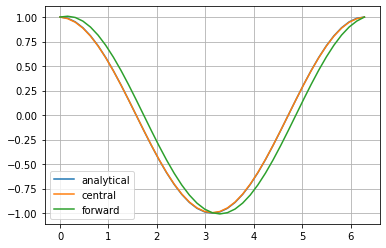

In [49]:
dfdx_num_cen, dfdx_num_for = func( dfdx, f, dx )
pyplot.plot( x, dfdx, label = 'analytical' )
pyplot.plot( x, dfdx_num_cen, label = 'central' )
pyplot.plot( x, dfdx_num_for, label = 'forward' )
pyplot.grid()
pyplot.legend();

## Numerical Accuracy Study (Question 2 Part 3)

In [50]:
N_coarse = 10 
N_mid = 100 
N_fine = 1000

dx_coarse = L / N_coarse
dx_mid = L / N_mid
dx_fine = L / N_fine

x_coarse = numpy.linspace( 0., L, N_coarse )
x_mid = numpy.linspace( 0., L, N_mid )
x_fine = numpy.linspace( 0., L, N_fine )

f_coarse = numpy.sin( x_coarse )
f_mid = numpy.sin( x_mid )
f_fine = numpy.sin( x_fine )

dfdx_coarse = numpy.cos( x_coarse )
dfdx_mid = numpy.cos( x_mid )
dfdx_fine = numpy.cos( x_fine )

In [51]:
coarse_cen, coarse_for = func( dfdx_coarse, f_coarse, dx_coarse )
mid_cen, mid_for = func( dfdx_mid, f_mid, dx_mid )
fine_cen, fine_for = func( dfdx_fine, f_fine, dx_fine )

err_coarse_cen = max( abs( dfdx_coarse - coarse_cen ) )
err_coarse_for = max( abs( dfdx_coarse - coarse_for ) )
err_mid_cen = max( abs( dfdx_mid - mid_cen ) )
err_mid_for = max( abs( dfdx_mid - mid_for ) )
err_fine_cen = max( abs( dfdx_fine - fine_cen ) )
err_fine_for = max( abs( dfdx_fine - fine_for ) )

err_arr_cen = numpy.array( [ err_coarse_cen, err_mid_cen, err_fine_cen ] )
err_arr_for = numpy.array( [ err_coarse_for, err_mid_for, err_fine_for ] )

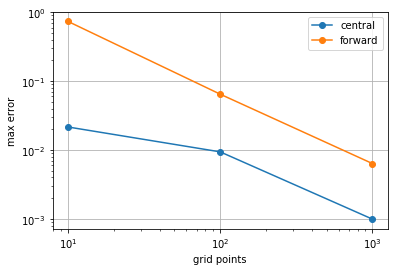

In [59]:
N_arr = numpy.array( [ N_coarse, N_mid, N_fine ] )
pyplot.loglog( N_arr, err_arr_cen, 'o-', label = 'central' )
pyplot.loglog( N_arr, err_arr_for, 'o-', label = 'forward' )
pyplot.xlabel( 'grid points' )
pyplot.ylabel( 'max error' )
pyplot.grid()
pyplot.legend();

## Modified Wave Number Analysis (Question 2 Part 4)

In [53]:
kmax = 2 * numpy.pi * ( -N / 2 ) / L
n = numpy.linspace( 0, -N / 2, 50 )
k = 2 * numpy.pi * n / L
k_kmax = k / kmax

In [54]:
# 2nd order central difference
kprime_cen = numpy.sin( 2 * numpy.pi * n / N ) / ( L / N )
kprime_kmax_cen = kprime_cen / kmax

# 2nd order 3-point forward differece
kprime_for = ( 3 / 2 ) * numpy.sin( 2 * numpy.pi * n / N ) / ( L / N )
kprime_kmax_for = kprime_for / kmax

In [55]:
asol = numpy.linspace( 0., 1., 50 )

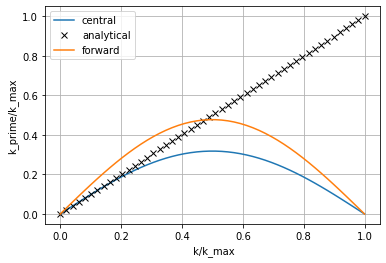

In [56]:
pyplot.plot( k_kmax, kprime_kmax_cen, label = 'central' )
pyplot.plot( asol, asol,'x', color = 'black', label = 'analytical' )
pyplot.plot( k_kmax, kprime_kmax_for, label = 'forward' )
pyplot.grid()
pyplot.legend()
pyplot.xlabel( ' k/k_max' )
pyplot.ylabel( 'k_prime/k_max' );

The plot of the modified wave number for the upwind scheme does not seem to match Prof. Balaras's results from the slides. I incorporated only the imaginary compenent of the analysis in the plot, which is why I believe it does not match. However, the plot is correct if only the imaginary component should be used.